# Introduction

Being a multicultural society characterised by rich linguistic diversity, South Africa is a 
multilingual with 11 official languages, each of which is guaranteed equal status. Most people in South Africa are multilingual and able to speak at least two or more of the official languages.




With the above,I am tasked with determining the natural language that a piece of text is written in. (.e. to take text which is in any of the 11 official languages and identify which language the text is in). Therefore, I wish to introduce you to an amazing project, the Language Detection model using Natural Language Processing

# About the dataset

Using the South African Language Detection dataset, which contains text details for 11 different languages.
Using the text given create a model which will be able to predict the given language.

# Importing libraries and dataset
******So let’s get started. First of all, we will import all the required libraries.

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")


from sklearn.model_selection import train_test_split

#modelimports 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

Import the language detection dataset

In [2]:
def read_file(path):
    '''This function reads the csv file given and displays the first five rows'''
    data = pd.read_csv(path)
#
    return data

In [3]:
#read the train set 
train_df = read_file('data/train_set.csv')
#read the test set
test_df = read_file('data/test_set.csv')
#display the first five rows
train_df.head(5)


,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


We know that this dataset contains text details for 11 different languages as explained ealier. So let’s count the value count for each language.

In [4]:
train_df["lang_id"].value_counts()
#test_df["lang_id"].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

Interesting!!!  all the languages are of the same value counts

Have a look at the type of data we got

In [5]:
#see the data types and the number of columns and rows we got
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


We only have two columns of object datatype and with no missing values. And 33000 entries in our dataset.


There is also another way of checking for missing values

In [6]:
# check for null values 
train_df.isnull().sum()

lang_id    0
text       0
dtype: int64

... no missing values we can go ahead and perform some EDA

In [7]:
# check out the first message 
train_df['text'][0]

'umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika'

In [8]:
# check out the last message 
train_df['text'][30000]

'ukuba igosa elongameleyo ligqiba ekubeni lo mbandela ufanele ukuxoxwa kwinkundla yokulingana igosa efanelekileyo kufuneka lidlulisele umbandela kumabhalana wenkundla yokulingana yena kufanele ngeli xesha limisiweyo lolu dluliselo anike umhla wokuxoxwa kwalo mbandela'

...quite some words we have!
It seems like our texts are clean. However, if there were punctuation marks, specials characters etc, tey would be
removed during data cleaning process for a machine learning project to be built.

#### **We can look at how the languages are distributed in the data using a bar graph and pie chart**

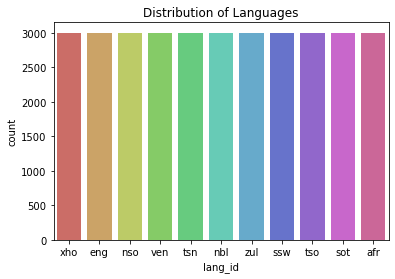

In [9]:
# A language bar graph plot 
sns.countplot(x = 'lang_id', data = train_df, palette="hls")
plt.title("Distribution of Languages");

From the look of it the categories are balanced. 
NB: Class imbalance if unhandled, can create a biased model. Its important that the this is resolved in the data processing

6.0
4.0


<AxesSubplot:ylabel='lang_id'>

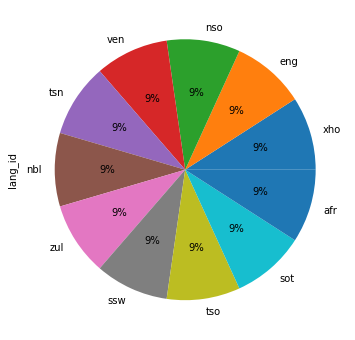

In [10]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

#  distribution of sentimennts across all tweets
train_df.lang_id.value_counts().plot(kind='pie', autopct='%1.0f%%')


A pie chart  also shows the distribution of languages across the country and it seems that langauges are evenly distributed all over South Africa

# **Feature Engineering**

#### NB  any feature engineering done on the train set should also be done on the test set to avoid errors whle testing your test set predictions

### Separating Independent and Dependent features
Now we can separate the dependent and independent variables, here text data is the independent variable and the lang_id is the dependent variable.

In [11]:
X = train_df["text"]
y = train_df["lang_id"]
X_t = test_df['text']

### Text Preprocessing
Our dataset maycontain unwanted symbols, 
numbers which will affect the quality of our model. So we should perform text preprocessing techniques.

In [12]:
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

In [13]:
# creating a list for appending the preprocessed text in the text data set
data_list1 = []
# iterating through all the text
for text in X_t:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list1.append(text)

### Bag of Words
Not only the output feature but also the input feature should be of the numerical form. So we are converting text into numerical form by creating a Bag of Words model using CountVectorizer.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(X)


#look at the shapegiven
X.shape 


(33000, 141958)

we use transform on the test data because we use the scaling paramaters learned on the train data to scale the test data

In [15]:
# we only transform the test data  

X_t = cv.transform(X_t)
X_t.shape

(5682, 141958)

#### Train Test Splitting
We preprocessed our input and output variable. The next step is to create the training set, for training the model and test set, for evaluating the test set. For this process, we are using a train test split.

In [16]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

# Model Training and Prediction


The model creation part.  Later we train the model using the training set and predict the output for the test set. using the classification report
We are using the:
1. NAIVE_BAYES algorithm for our model creation. Later we train the model using the training set and predict the output for the test set. using the classification report

In [18]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
#fit the model
model.fit(x_train, y_train)
#predict y labels
y_pred1 = model.predict(x_test)

#metrics report
ac = accuracy_score(y_test, y_pred1)

report = classification_report(y_test,y_pred1)

print("Accuracy is :",ac)
#print("Matrix is :",cm)
print("Report is :",report)

Accuracy is : 0.9990909090909091
Report is :               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       587
         eng       0.99      1.00      1.00       574
         nbl       1.00      1.00      1.00       613
         nso       1.00      1.00      1.00       570
         sot       1.00      1.00      1.00       600
         ssw       1.00      1.00      1.00       624
         tsn       1.00      1.00      1.00       581
         tso       1.00      1.00      1.00       597
         ven       1.00      1.00      1.00       599
         xho       1.00      1.00      1.00       621
         zul       1.00      1.00      1.00       634

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



2. Random Forest Classifier algorithm for our model creation

In [19]:
rf_clf = RandomForestClassifier(n_estimators=100) # Create Random Forest classifer object
rf_clf.fit(x_train,y_train) # Fit/Train Random Forest Classifer on training set

#predict y labels
y_pred5 = rf_clf.predict(x_test)

#metrics report
ac = accuracy_score(y_test, y_pred5)

report = classification_report(y_test,y_pred5)

print("Accuracy is :",ac)
#print("Matrix is :",cm)
print("Report is :",report)



Accuracy is : 0.9889393939393939
Report is :               precision    recall  f1-score   support

         afr       0.99      1.00      1.00       587
         eng       0.99      1.00      1.00       574
         nbl       0.98      0.97      0.97       613
         nso       1.00      1.00      1.00       570
         sot       1.00      1.00      1.00       600
         ssw       0.99      0.98      0.98       624
         tsn       1.00      1.00      1.00       581
         tso       1.00      1.00      1.00       597
         ven       1.00      1.00      1.00       599
         xho       0.98      0.99      0.98       621
         zul       0.95      0.96      0.96       634

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



3. LOGISTIC REGRESSION for model creation

In [20]:

#instantiate the model
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
#fit the train data
LRmodel.fit(x_train, y_train)
#predict y labels
y_pred2 = LRmodel.predict(x_test)

#metrics report
ac = accuracy_score(y_test, y_pred2)

report = classification_report(y_test,y_pred2)

print("Accuracy is :",ac)
#print("Matrix is :",cm)
print("Report is :",report)

Accuracy is : 0.9953030303030304
Report is :               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       587
         eng       1.00      1.00      1.00       574
         nbl       0.99      0.99      0.99       613
         nso       1.00      1.00      1.00       570
         sot       1.00      0.99      1.00       600
         ssw       0.99      1.00      0.99       624
         tsn       1.00      1.00      1.00       581
         tso       1.00      1.00      1.00       597
         ven       1.00      1.00      1.00       599
         xho       1.00      0.99      0.99       621
         zul       0.98      0.98      0.98       634

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



4. BERNOULLINB model

In [17]:

BNBmodel = BernoulliNB()
BNBmodel.fit(x_train, y_train)
y_pred3 = BNBmodel.predict(x_test)

#metrics report
ac = accuracy_score(y_test, y_pred3)

report = classification_report(y_test,y_pred3)

print("Accuracy is :",ac)
#print("Matrix is :",cm)
print("Report is :",report)

Accuracy is : 0.9993939393939394
Report is :               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       587
         eng       1.00      1.00      1.00       574
         nbl       1.00      1.00      1.00       613
         nso       1.00      1.00      1.00       570
         sot       1.00      1.00      1.00       600
         ssw       1.00      1.00      1.00       624
         tsn       1.00      1.00      1.00       581
         tso       1.00      1.00      1.00       597
         ven       1.00      1.00      1.00       599
         xho       1.00      1.00      1.00       621
         zul       1.00      1.00      1.00       634

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



5. SUPPORT VECTOR CLASSIFIER

In [22]:
from sklearn.svm import SVC
svc = SVC( kernel='rbf')
svc.fit(x_train, y_train)
y_pred4 = svc.predict(x_test)

#metrics report
ac = accuracy_score(y_test, y_pred4)
report = classification_report(y_test,y_pred4)

print("Accuracy is :",ac)
#print("Matrix is :",cm)
print("Report is :",report)

Accuracy is : 0.9940909090909091
Report is :               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       587
         eng       1.00      1.00      1.00       574
         nbl       0.99      0.98      0.98       613
         nso       1.00      0.99      1.00       570
         sot       1.00      0.99      1.00       600
         ssw       0.99      1.00      1.00       624
         tsn       0.99      1.00      1.00       581
         tso       1.00      1.00      1.00       597
         ven       1.00      1.00      1.00       599
         xho       0.99      0.99      0.99       621
         zul       0.97      0.98      0.98       634

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



6. PASSIVE AGGRESSIVE CLASSIFIER

We will try and use a different approcah to vecctorize our values- the TfidVectorizer

In [23]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
X = tfidf_vectorizer.fit_transform(train_df['text'])
X_t = tfidf_vectorizer.transform(test_df['text'])
Y = train_df.lang_id
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(X_train, Y_train)
pred = pass_tf.predict(X_test)

#metrics report
ac = accuracy_score(Y_test, pred)
report = classification_report(Y_test,pred)

print("Accuracy is :",ac)
#print("Matrix is :",cm)
print("Report is :",report)

Accuracy is : 0.9974242424242424
Report is :               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       592
         eng       1.00      1.00      1.00       576
         nbl       1.00      0.99      0.99       565
         nso       1.00      1.00      1.00       618
         sot       1.00      1.00      1.00       588
         ssw       1.00      1.00      1.00       613
         tsn       1.00      1.00      1.00       592
         tso       1.00      1.00      1.00       593
         ven       1.00      1.00      1.00       605
         xho       0.99      1.00      0.99       631
         zul       0.99      0.99      0.99       627

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



# Model Evaluation
we can evaluate our models

### We combine all the classification models above
We will define the model names and call the model implementation classes. Take note of the hyperparameters used

In [24]:
names = ['MultinomialNB', 'Random Forest',
         'LogisticRegression', 'BernoulliNB','SVC','PassiveAggressiveClassifier'
         ]

In [25]:
classifiers = [
    MultinomialNB(),
    RandomForestClassifier(n_estimators=100),
    LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1),
    BernoulliNB(),
    SVC(kernel='rbf'),
    PassiveAggressiveClassifier()
    
    
]

In [26]:
from sklearn import metrics
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(x_train, y_train)

    print ('... predicting')
    y_pred = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)

    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred, average='weighted')
    recall    = metrics.recall_score(y_train, y_pred, average='weighted')

    f1        = metrics.f1_score(y_train, y_pred, average='weighted')
    f1_test   = metrics.f1_score(y_test, y_pred_test, average='weighted')

    # Save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])


results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting MultinomialNB model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting LogisticRegression model...
... predicting
... scoring
Fitting BernoulliNB model...
... predicting
... scoring
Fitting SVC model...
... predicting
... scoring
Fitting PassiveAggressiveClassifier model...
... predicting
... scoring
... All done!


Have a look at the results

In [27]:
results.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Random Forest,1.000000,1.000000,1.000000,1.000000,0.987902,624.965396
LogisticRegression,1.000000,1.000000,1.000000,1.000000,0.995300,226.962378
PassiveAggressiveClassifier,1.000000,1.000000,1.000000,1.000000,0.996667,4.345947
BernoulliNB,0.999886,0.999887,0.999886,0.999886,0.999394,0.726459
MultinomialNB,0.999848,0.999849,0.999848,0.999849,0.999091,0.713159
SVC,0.999697,0.999697,0.999697,0.999697,0.994096,174.066726


We can plot the above for easier comprehension

<AxesSubplot:xlabel='Classifier'>

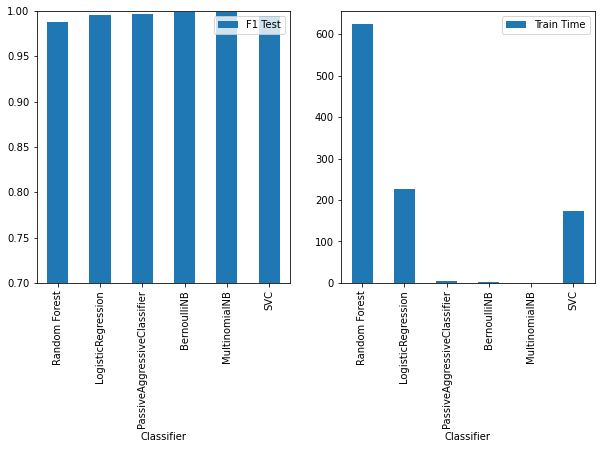

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results.sort_values('F1 Train', ascending=False, inplace=True)
results.plot(y=['F1 Test'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.70,1.00])
results.plot(y='Train Time', kind='bar', ax=ax[1])

The random forest model took a long timein fitting the data and performed the least.. Multinormal Naive Bayes took a very shorter period while BernoulliNB  performed the best.
To better understand the performance of one of the models, lets view the confusion matricx and classification report BernoulliNB results

In [29]:
confusion['BernoulliNB']

array([[2413,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 2426,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 2387,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 2430,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 2400,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 2376,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 2419,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 2403,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 2401,    0,    0],
       [   0,    2,    0,    0,    0,    0,    0,    0,    0, 2377,    0],
       [   0,    1,    0,    0,    0,    0,    0,    0,    0,    0, 2365]],
      dtype=int64)

In [30]:
print(class_report['BernoulliNB'])

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00      2413
         eng       1.00      1.00      1.00      2426
         nbl       1.00      1.00      1.00      2387
         nso       1.00      1.00      1.00      2430
         sot       1.00      1.00      1.00      2400
         ssw       1.00      1.00      1.00      2376
         tsn       1.00      1.00      1.00      2419
         tso       1.00      1.00      1.00      2403
         ven       1.00      1.00      1.00      2401
         xho       1.00      1.00      1.00      2379
         zul       1.00      1.00      1.00      2366

    accuracy                           1.00     26400
   macro avg       1.00      1.00      1.00     26400
weighted avg       1.00      1.00      1.00     26400



##### From the  above metrics analysis of  the performance of the models, BernoulliNB model  outperforms the rest?

The accuracy of the model is 0.9998 which is very good and our model is performing well. Now let’s plot the confusion matrix using the seaborn heatmap.

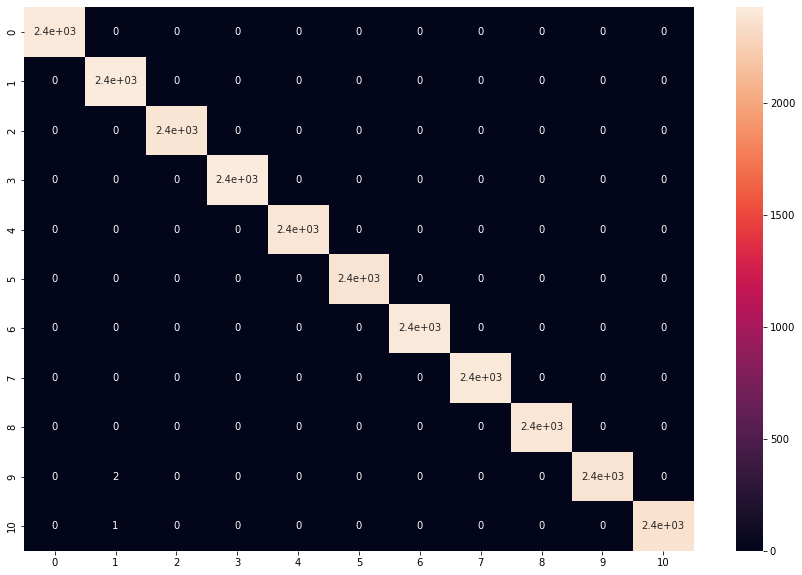

In [31]:

plt.figure(figsize=(15,10))
sns.heatmap(confusion['BernoulliNB'], annot = True)
plt.show()

When looking into each language, almost all the predictions are right.

# Predicting with some more data
Now let’s test the model prediction using text in different languages.

In [18]:
X_t.shape

(5682, 141958)

In [19]:
text_pred= BNBmodel.predict(X_t)

In [ ]:
#The following codes are used to save the expected predictions for kaggle submission
#kaggle_bnb = test_df[['index']]
#kaggle_bnb['lang_id']= text_pred
#kaggle_bnb.to_csv('bnb.csv', index = None)

In [ ]:
#read_file('bnb.csv')

Best models are built through iteration. We implement a quick way that should give us a good idea of how to proceed in finding a better model to this particular language classification. The quicker we can generate a couple of results, the quicker we can come up with new ideas of how to proceed.

# Conclusion
This is a basic Natural Language Processing(NLP) technique. We did analyze the data and preprocess it accordingly. A bag of words model was one way of representing our text data. Text extraction and vectorization are important steps for good predictions in NLP.BernoulliNB has proven to be a better model in language, hence more accurate results were produced.